In [1]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

number of processors: 12


In [85]:
from matplotlib import rcParams
rcParams['figure.dpi']=75


C:\Users\ASUS\anaconda3\lib\site-packages\diffractio\scalar_fields_XZ.py:346: ComplexWarning: Casting complex values to real discards the imaginary part
  self.n[:, i] = fftshift(


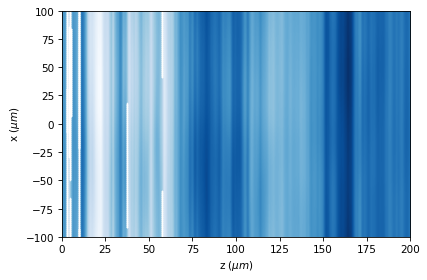

In [79]:
x0 = np.linspace(-100 * um, 100 * um, 567)
z0 = np.linspace(0 * um, 200 * um, 567)
wavelength = 0.532 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=2)

filename = "background2.jpg"
t1.image(
    filename=filename,
    n_max=1.3,
    n_min=1,
    angle=0 * degrees,
    invert=False)
t1.filter_refraction_index(
    type_filter=2, pixels_filtering=100, max_diff_filter=0.000001, draw_check=False)
t1.draw_refraction_index();

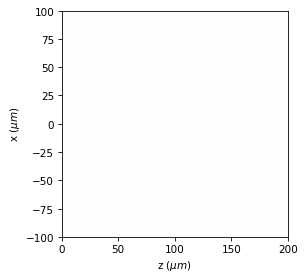

In [63]:
x0 = np.linspace(-100 * um, 100 * um, 3024)
z0 = np.linspace(0 * um, 200 * um, 3024)
wavelength = .2 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=100 * um, w0=15 * um, theta=0 * degrees)


t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.incident_field(u0)

filename = "IMG.JPG"
t1.image(
    filename=filename,
    n_max=1.3,
    n_min=1,
    angle=0 * degrees,
    invert=True)

t1.draw_refraction_index(scale='scaled')

In [82]:
t1.RS(verbose=10)

- Needs denser sampling: factor: 0.75


ValueError: operands could not be broadcast together with shapes (569,) (567,) 

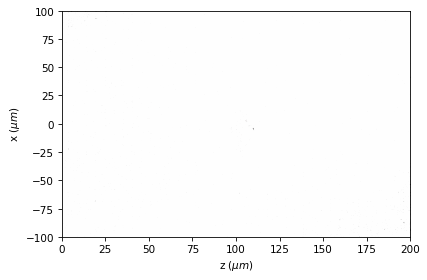

In [65]:
t1.draw(kind='intensity', draw_borders=True);

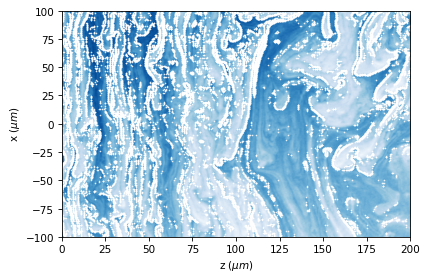

In [85]:
x0 = np.linspace(-100 * um, 100 * um, 567)
z0 = np.linspace(0 * um, 200 * um, 567)
wavelength = 0 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

filename = "background2.jpg"
t1.image(
    filename=filename,
    n_max=1.1,
    n_min=1,
    angle=0 * degrees,
    invert=True)
t1.draw_refraction_index()

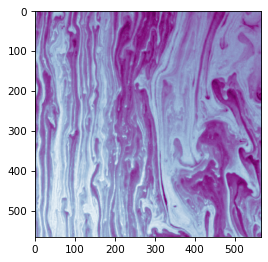

In [90]:
import matplotlib.pyplot as plt
plt.imshow(t1.n, cmap=plt.cm.BuPu_r)

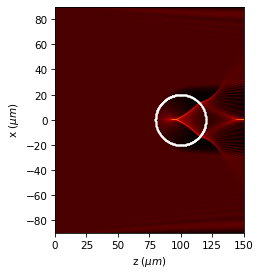

In [101]:
x0 = np.linspace(-100 * um, 100 * um, 2048)
z0 = np.linspace(0 * um, 150 * um, 2048)
wavelength = .85 * um

radius_sphere = 40 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)



u1.sphere(
    r0=(0, 100 * um),
    radius=(20 * um, 20 * um),
    refraction_index=2.5,
    angle=0)

u1.sphere(
    r0=(0, 30 * um),
    radius=(30 * um, 30 * um),
    refraction_index=1,
    angle=0)

u1.incident_field(u0)
edges = u1.surface_detection()

u1.filter_refraction_index(
    type_filter=2, pixels_filtering=2, max_diff_filter=0.05, draw_check=False)

u1.BPM(verbose=False)

u1.draw(
    kind='intensity',
    logarithm=True,
    normalize='maximum',
    draw_borders=True,
    scale='scaled',
    edge_matrix=edges)
plt.ylim(-90, 90);

